In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import datetime as dt

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
# create date range for June
june_temps = session.query(Measurement.tobs, Measurement.date).filter(func.strftime('%m', Measurement.date) == '06').all()
june_temps

[(78.0, '2010-06-01'),
 (76.0, '2010-06-02'),
 (78.0, '2010-06-03'),
 (76.0, '2010-06-04'),
 (77.0, '2010-06-05'),
 (78.0, '2010-06-06'),
 (77.0, '2010-06-07'),
 (78.0, '2010-06-08'),
 (78.0, '2010-06-09'),
 (79.0, '2010-06-10'),
 (78.0, '2010-06-11'),
 (78.0, '2010-06-12'),
 (78.0, '2010-06-13'),
 (77.0, '2010-06-14'),
 (78.0, '2010-06-15'),
 (78.0, '2010-06-16'),
 (77.0, '2010-06-17'),
 (77.0, '2010-06-18'),
 (82.0, '2010-06-19'),
 (78.0, '2010-06-20'),
 (78.0, '2010-06-21'),
 (78.0, '2010-06-22'),
 (78.0, '2010-06-23'),
 (78.0, '2010-06-24'),
 (77.0, '2010-06-25'),
 (76.0, '2010-06-26'),
 (78.0, '2010-06-27'),
 (78.0, '2010-06-28'),
 (78.0, '2010-06-29'),
 (78.0, '2010-06-30'),
 (77.0, '2011-06-01'),
 (78.0, '2011-06-02'),
 (73.0, '2011-06-03'),
 (70.0, '2011-06-04'),
 (76.0, '2011-06-05'),
 (77.0, '2011-06-06'),
 (77.0, '2011-06-07'),
 (77.0, '2011-06-08'),
 (77.0, '2011-06-09'),
 (78.0, '2011-06-10'),
 (77.0, '2011-06-11'),
 (77.0, '2011-06-12'),
 (78.0, '2011-06-13'),
 (78.0, '20

In [5]:
#  3. Convert the June temperatures to a list.
temp_list = list((june_temps))

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temps_df = pd.DataFrame(temp_list, columns=['Temperatures', 'Date'])

In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temps_df.describe()

,Temperatures
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temps = session.query(Measurement.tobs, Measurement.date).filter(func.strftime('%m', Measurement.date) == '12').all()
dec_temps

[(76.0, '2010-12-01'),
 (74.0, '2010-12-03'),
 (74.0, '2010-12-04'),
 (64.0, '2010-12-06'),
 (64.0, '2010-12-07'),
 (67.0, '2010-12-08'),
 (77.0, '2010-12-09'),
 (66.0, '2010-12-10'),
 (69.0, '2010-12-11'),
 (68.0, '2010-12-12'),
 (68.0, '2010-12-13'),
 (71.0, '2010-12-14'),
 (74.0, '2010-12-15'),
 (67.0, '2010-12-16'),
 (66.0, '2010-12-17'),
 (69.0, '2010-12-18'),
 (71.0, '2010-12-19'),
 (70.0, '2010-12-23'),
 (70.0, '2010-12-24'),
 (74.0, '2010-12-26'),
 (74.0, '2010-12-27'),
 (71.0, '2010-12-28'),
 (75.0, '2010-12-29'),
 (75.0, '2010-12-30'),
 (72.0, '2010-12-31'),
 (69.0, '2011-12-01'),
 (68.0, '2011-12-02'),
 (73.0, '2011-12-03'),
 (74.0, '2011-12-04'),
 (73.0, '2011-12-05'),
 (73.0, '2011-12-06'),
 (73.0, '2011-12-07'),
 (73.0, '2011-12-08'),
 (71.0, '2011-12-09'),
 (73.0, '2011-12-10'),
 (73.0, '2011-12-11'),
 (77.0, '2011-12-12'),
 (72.0, '2011-12-13'),
 (71.0, '2011-12-14'),
 (73.0, '2011-12-15'),
 (70.0, '2011-12-16'),
 (73.0, '2011-12-17'),
 (69.0, '2011-12-18'),
 (74.0, '20

In [9]:
# 7. Convert the December temperatures to a list.
dec_list = list((dec_temps))

In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temps_df = pd.DataFrame(dec_list, columns=['Temperatures', 'Date'])

In [11]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temps_df.describe()

,Temperatures
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [12]:
dec_prcp = session.query(Measurement.prcp, Measurement.date).filter(func.strftime('%m', Measurement.date) == '12').all()
dec_prcp_list = list((dec_prcp))
dec_prcp_df = pd.DataFrame(dec_prcp_list, columns=['Precipitation', 'Date'])
dec_prcp_df

,Precipitation,Date
0,0.04,2010-12-01
1,0.00,2010-12-03
2,0.00,2010-12-04
3,0.00,2010-12-06
4,0.00,2010-12-07
...,...,...
1512,0.14,2016-12-27
1513,0.14,2016-12-28
1514,1.03,2016-12-29
1515,2.37,2016-12-30


In [13]:
dec_prcp_df.describe()

,Precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


In [14]:
june_prcp = session.query(Measurement.prcp, Measurement.date).filter(func.strftime('%m', Measurement.date) == '06').all()
june_prcp_list = list((june_prcp))
june_prcp_df = pd.DataFrame(june_prcp, columns=['Precipitation', 'Date'])
june_prcp_df

,Precipitation,Date
0,0.00,2010-06-01
1,0.01,2010-06-02
2,0.00,2010-06-03
3,0.00,2010-06-04
4,0.00,2010-06-05
...,...,...
1695,0.02,2017-06-26
1696,0.10,2017-06-27
1697,0.02,2017-06-28
1698,0.04,2017-06-29


In [15]:
june_prcp_df.describe()

,Precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [16]:
june_prcp_df.describe()

,Precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [17]:
dec_prcp_df.describe()

,Precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


In [18]:
june_temps_df.describe()

,Temperatures
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [19]:
dec_temps_df.describe()

,Temperatures
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


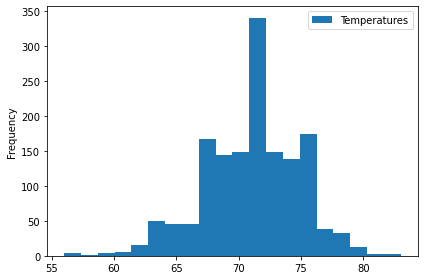

In [25]:
dec_temps_df.plot.hist(bins=20)
plt.tight_layout()

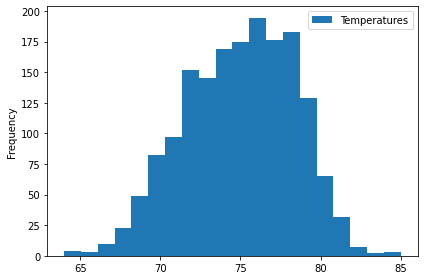

In [24]:
june_temps_df.plot.hist(bins=20)
plt.tight_layout()